In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import joblib

In [6]:
# 1. Load Dataset
data = pd.read_csv("dataset/Crop_recommendation.csv")
data.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [7]:
data.shape

(2200, 8)

In [8]:
# 2. Features & Target
X = data.drop("label", axis=1)
y = data["label"]

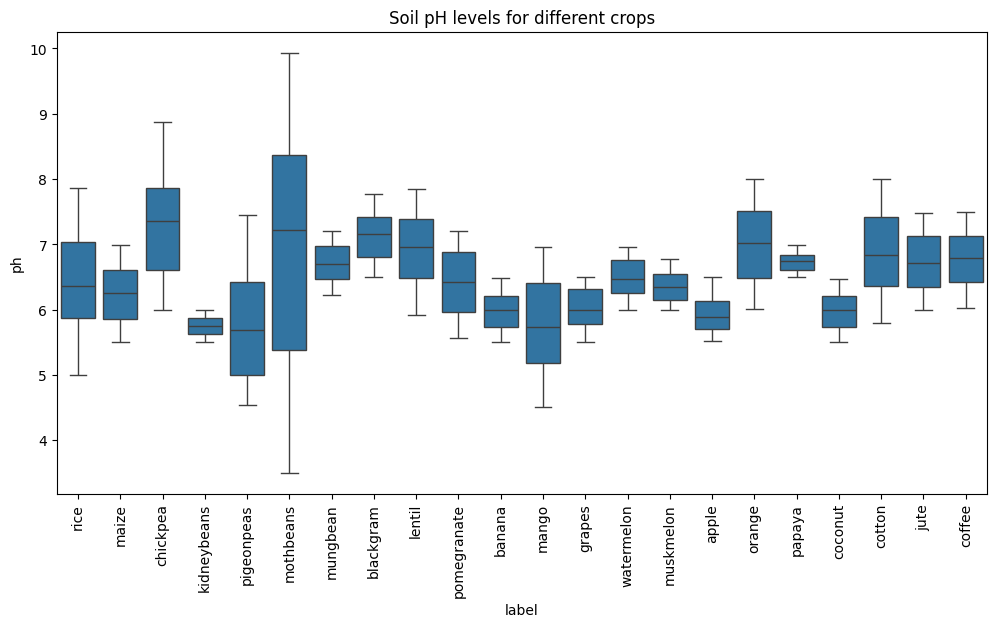

In [9]:
plt.figure(figsize=(12,6))
sns.boxplot(data=data, x="label", y="ph")
plt.xticks(rotation=90)
plt.title("Soil pH levels for different crops")
plt.show()

In [10]:
# 3. Encode target labels (crop names)
le = LabelEncoder()
y_encoded = le.fit_transform(y)

In [11]:
# 4. Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.25, random_state=42)

In [12]:
# 5. Train Model (Random Forest)
model = RandomForestClassifier(n_estimators=200, random_state=42)
model.fit(X_train, y_train)

,n_estimators,200
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [13]:
# 6. Evaluate
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=le.classes_))

Accuracy: 0.9872727272727273

Classification Report:
               precision    recall  f1-score   support

       apple       1.00      1.00      1.00        29
      banana       1.00      1.00      1.00        23
   blackgram       1.00      1.00      1.00        24
    chickpea       1.00      1.00      1.00        31
     coconut       1.00      1.00      1.00        27
      coffee       1.00      1.00      1.00        26
      cotton       1.00      1.00      1.00        21
      grapes       1.00      1.00      1.00        19
        jute       0.82      1.00      0.90        27
 kidneybeans       1.00      1.00      1.00        24
      lentil       0.94      1.00      0.97        15
       maize       1.00      1.00      1.00        23
       mango       1.00      1.00      1.00        27
   mothbeans       1.00      0.96      0.98        26
    mungbean       1.00      1.00      1.00        26
   muskmelon       1.00      1.00      1.00        22
      orange       1.00    

In [14]:
# 7. Save Model & Encoder
joblib.dump(model, "model_outputs/crop_model.pkl")
joblib.dump(le, "model_outputs/crop_label_encoder.pkl")

['model_outputs/crop_label_encoder.pkl']

In [15]:
import joblib
import numpy as np

# Load the trained model and encoder
model = joblib.load("model_outputs/crop_model.pkl")
le = joblib.load("model_outputs/crop_label_encoder.pkl")

In [16]:
import joblib
import numpy as np

# Multiple test samples
samples = np.array([
    [80, 40, 40, 25.0, 80.0, 6.2, 210],   # Likely rice/wheat
    [20, 15, 30, 35.0, 50.0, 7.0, 60],    # Likely groundnut/millet
    [60, 55, 45, 28.0, 65.0, 6.0, 150]    # Likely maize 
])

preds = model.predict(samples)
crops = le.inverse_transform(preds)

for i, crop in enumerate(crops):
    print(f"Sample {i+1}: Recommended Crop → {crop}")

Sample 1: Recommended Crop → rice
Sample 2: Recommended Crop → mango
Sample 3: Recommended Crop → coffee


c:\Users\B_Jayanth\OneDrive\Desktop\AICTE AIML\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [17]:
from sklearn.metrics import accuracy_score

y_test_pred = model.predict(X_test)
print("Test Accuracy:", accuracy_score(y_test, y_test_pred))

Test Accuracy: 0.9872727272727273
